In [322]:
# SGD (stochastic gradient descent)
import numpy as np
import sklearn.datasets as d
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [323]:
# Generation of dataset
data, target, coef = d.make_regression(
    n_samples=1000, n_features=2, n_informative=2, n_targets=1, noise=5, coef=True, random_state=2)

display(data, target, coef)

array([[ 0.37879447, -0.61837549],
       [-0.65293115, -1.06706712],
       [-1.06581629, -0.34682333],
       ...,
       [ 1.19451016,  1.00147133],
       [ 0.1256231 ,  0.35261274],
       [-0.05674652,  0.41214611]])

array([-2.61123036e+01, -1.22254125e+02, -9.33701155e+01,  2.23698676e+01,
       -1.19353069e+00,  7.55093913e+01,  4.17391914e+00,  3.37850492e+01,
       -4.13327830e+01, -1.71060319e+00,  6.91533479e+01, -3.84944494e+01,
       -1.40841311e+01, -7.87094871e+00,  2.24655412e+01,  3.52449558e+01,
        3.54202311e+01,  4.54019343e+01,  3.93612257e+01,  1.13645719e-01,
       -1.23294801e+01,  1.18940297e+02,  2.90747757e+02,  1.07353713e+01,
        1.33621709e+02, -8.58105655e+01, -1.19323461e+01,  5.66776267e+01,
        1.45867826e+02, -2.72626165e+02, -3.86689973e+00,  4.64700598e+01,
        1.34844522e+02,  1.01167107e+01,  1.02407708e+01,  1.50555004e+01,
        6.05940840e+01, -1.46615087e-01, -1.04571676e+02, -1.09697817e+02,
        1.21274981e+01,  9.99648515e+01,  8.47610760e+01, -1.05265489e+02,
        1.35034101e+02, -3.24978496e+02,  6.56243085e+01, -4.80030943e+01,
        8.43343786e+01,  3.38914896e+00,  2.65015621e+01,  6.26227854e+01,
       -1.45046490e+02,  

array([62.6735955, 68.0472182])

In [324]:
# Mean & standard deviation
means = np.mean(data, axis=0)  # axis=0 => cols
stds = np.std(data, axis=0)
display(f'means: {means}', f'standard deviation: {stds}')

'means: [-0.0790127   0.02045785]'

'standard deviation: [0.98563537 0.99101454]'

In [325]:
# Standardization 1 (optimal variant)
for i, sample in enumerate(data):
     data[i]  = (sample - means)/ stds

print(data)

[[ 0.46447924 -0.64462559]
 [-0.58228272 -1.09738549]
 [-1.00118525 -0.3706113 ]
 ...
 [ 1.29208317  0.98990825]
 [ 0.20761816  0.33516651]
 [ 0.02259069  0.39523966]]


In [326]:
# Standardization 2 (loop in loop)
data2 = np.copy(data)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data2[i][j] = (data[i][j] - means[j]) / stds[j]

print(data2)

[[ 0.55141279 -0.67111371]
 [-0.51060467 -1.12797874]
 [-0.93561227 -0.39461495]
 ...
 [ 1.39107819  0.97824034]
 [ 0.29080822  0.3175621 ]
 [ 0.10308416  0.37817993]]


In [327]:
# RMS error (root mean square error)
def mse(X, y, w):
    # multi
    y_pred = np.dot(X, w)
    return sum((y - y_pred)**2) / y.size

In [328]:
print(mse(data, target, coef))

40.222639186073074


In [329]:
# init weights
w = np.zeros(coef.size)

In [330]:
# vector list of weights
w_list = [w.copy()]
print('Weights list:', w_list)

# list of errors
errors = []

# learning rate
eta = 0.5

# max value of iterations
max_iters = 1e4

# convergence criterion
min_weight_dist = 1e-8

# initial value of convergence criterion
weight_dist = np.inf

# counter iterations
iters_n = 0

np.random.seed(1234)

while weight_dist > min_weight_dist and iters_n < max_iters:
    # generation random index of sample (for SGD)
    train_ind = np.random.randint(data.shape[0])

    y_pred = np.dot(data[train_ind], w)

    dQ = 2 / target.shape[0] * np.dot(data[train_ind].T, (y_pred - target[train_ind]))

    w_new = w - eta * dQ
    weight_dist = np.linalg.norm(w_new - w, ord=2)

    error = mse(data, target, w_new)

    errors.append(error)
    w_list.append(w_new.copy())

    w = w_new
    iters_n += 1

    if (iters_n) % 10 == 0:
        print(f'Iteration: {iters_n}, MSE: {error:.4f}, wieghts: {w_new}')

Weights list: [array([0., 0.])]
Iteration: 10, MSE: 8062.8937, wieghts: [0.68175394 0.35403725]
Iteration: 20, MSE: 7982.1909, wieghts: [0.82719997 0.83817664]
Iteration: 30, MSE: 7832.4234, wieghts: [1.19503153 1.65790624]
Iteration: 40, MSE: 7771.2255, wieghts: [1.56891849 1.79345046]
Iteration: 50, MSE: 7558.7215, wieghts: [2.10643629 2.96919395]
Iteration: 60, MSE: 7265.0515, wieghts: [3.36732962 4.16211119]
Iteration: 70, MSE: 7053.5438, wieghts: [4.51671998 4.83264071]
Iteration: 80, MSE: 6765.2167, wieghts: [5.96576902 5.89782965]
Iteration: 90, MSE: 6621.6917, wieghts: [6.80789283 6.34050523]
Iteration: 100, MSE: 6556.2005, wieghts: [6.99085453 6.7256549 ]
Iteration: 110, MSE: 6326.5049, wieghts: [8.18181523 7.6117891 ]
Iteration: 120, MSE: 6183.7181, wieghts: [8.78053337 8.30584704]
Iteration: 130, MSE: 6102.1393, wieghts: [9.03909911 8.78253021]
Iteration: 140, MSE: 5933.1374, wieghts: [9.61416615 9.75113498]
Iteration: 150, MSE: 5889.0801, wieghts: [ 9.74846906 10.02117838]


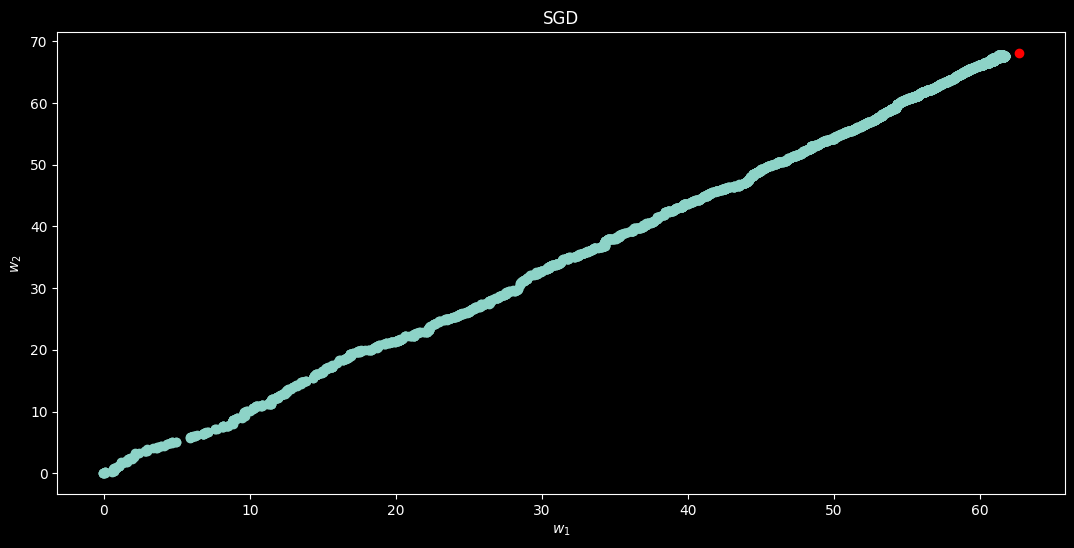

In [331]:
# Visualization change of weights
w_list = np.array(w_list)

plt.figure(figsize=(13, 6))
plt.title('SGD')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')

plt.show()

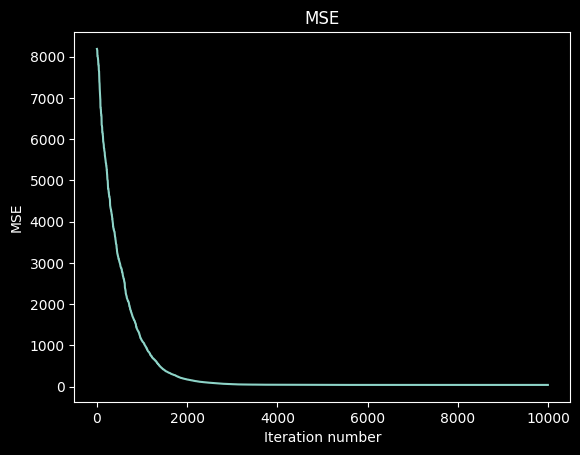

In [332]:
# Visualization of functional  error
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.show()